In [1]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:

!pip install --upgrade pyarrow pandas



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you hav

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import polars as pl
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

# Additional check for GPU device name
gpu_device = tf.test.gpu_device_name()
if gpu_device:
    print(f"TensorFlow is using GPU: {gpu_device}")
else:
    print("TensorFlow is not using a GPU")

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU: /device:GPU:0


In [5]:
! kaggle datasets download -d mpp1998/leap-percentiles-of-full-df
! unzip -o  leap-percentiles-of-full-df.zip -d    leap-percentiles-of-full-df

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leap-percentiles-of-full-df
License(s): unknown
100% 2.42M/2.42M [00:00<00:00, 4.26MB/s]
100% 2.42M/2.42M [00:00<00:00, 3.66MB/s]
Archive:  leap-percentiles-of-full-df.zip
  inflating: leap-percentiles-of-full-df/limits_train_percentiles.csv  
  inflating: leap-percentiles-of-full-df/myutils/constants.py  
  inflating: leap-percentiles-of-full-df/myutils/kaggle_metric_utilities.py  
  inflating: leap-percentiles-of-full-df/myutils/metric.py  
  inflating: leap-percentiles-of-full-df/percentiles.pkl  


In [6]:
! kaggle datasets download -d mpp1998/leapstandard-scaler-data
! unzip -o  leapstandard-scaler-data.zip -d  leap-nn-data-input

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leapstandard-scaler-data
License(s): Apache 2.0
100% 11.5G/11.5G [06:58<00:00, 32.6MB/s]
100% 11.5G/11.5G [06:58<00:00, 29.4MB/s]
Archive:  leapstandard-scaler-data.zip
  inflating: leap-nn-data-input/df_0_features_1.parquet  
  inflating: leap-nn-data-input/df_0_features_array.npy  
  inflating: leap-nn-data-input/df_0_targets.parquet  
  inflating: leap-nn-data-input/df_10_features_1.parquet  
  inflating: leap-nn-data-input/df_10_features_array.npy  
  inflating: leap-nn-data-input/df_10_targets.parquet  
  inflating: leap-nn-data-input/df_11_features_1.parquet  
  inflating: leap-nn-data-input/df_11_features_array.npy  
  inflating: leap-nn-data-input/df_11_targets.parquet  
  inflating: leap-nn-data-input/df_12_features_1.parquet  
  inflating: leap-nn-data-input/df_12_features_array.npy  
  inflating: leap-nn-data-input/df_12_targets.parquet  
  inflating: leap-nn-data-input/df_13_features_1.parquet  
  inflating: leap-nn-data-

In [7]:
df_limits = pd.read_csv("leap-percentiles-of-full-df/limits_train_percentiles.csv",index_col=0)
df_limits.sort_values(by="max") .head(50)

,max,min,q99,q01,std,mean
column,,,,,,
ptend_q0002_12,-2.147357e-53,-2.692638e-38,-1.062446e-48,-5.291556e-39,7.798521e-41,-2.113759e-41
ptend_q0002_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_17,0.000000e+00,-1.394760e-39,0.000000e+00,-5.596019e-56,1.369964e-43,-3.815392e-46
ptend_q0002_16,0.000000e+00,-1.959202e-44,0.000000e+00,0.000000e+00,1.684660e-48,-5.760587e-51
ptend_q0002_15,0.000000e+00,-6.381237e-48,0.000000e+00,0.000000e+00,3.346434e-52,-9.342572e-55


In [8]:
import tensorflow as tf
import pandas as pd
import glob



In [9]:
RAIZ="ptend_u"

In [10]:
indices=[0,]
x1=[]
for i in indices:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1 .append( np.load(file))
x1=np.concatenate(x1,axis=0)
x2=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices],axis=0)
y =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet")for i in indices],axis=0)
y = y [[e for e in y.columns if RAIZ in e]]




In [11]:
x1_val=[]
indices_val=[6]
for i in indices_val:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_val .append( np.load(file))
x1_val=np.concatenate(x1_val,axis=0)
x2_val=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_val],axis=0)
y_val =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_val ],axis=0)
y_val = y_val [[e for e in y_val.columns if RAIZ in e]]

x1.shape,x2.shape, y.shape

((246035, 60, 9), (246035, 16), (246035, 60))

In [12]:
x1_test=[]
indices_test=range(30,41)
for i in indices_test:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_test.append( np.load(file))
x1_test=np.concatenate(x1_test,axis=0)
x2_test=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_test],axis=0)
y_test =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_test ],axis=0)
y_test= y_test [[e for e in y_test.columns if  RAIZ in e]]

x1_test.shape,x2_test.shape, y_test.shape

((2622669, 60, 9), (2622669, 16), (2622669, 60))

In [13]:


CFG = {
    'time_mixing_dim':60,
    "feature_mixing_dim":128,
    'encoder_first_dropout':0.05,
    'encoder_second_dropout':0.05,
    'model_num_encoder_layers':1,
    'model_num_lstm_layers':2,
    "lstm_dim": 128,
    "do_time_mixing" : False


}
BATCH_SIZE =1024

In [14]:
import tensorflow as tf
import numpy as np

In [15]:
HACER_PRUEBAS = False
if HACER_PRUEBAS:
    x1 = tf.keras.layers.Dense(8)(np.arange(10).reshape(5, 2))
    x2 =  tf.tile(tf.keras.layers.Dense(8)(np.arange(18, 20).reshape(1, 2)),(5,1))
    tf.reshape(x2,(-1,1))
    x1.shape,x2.shape
    concatted = tf.keras.layers.Concatenate()([x1, x2])
    concatted.shape


In [16]:
class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear1 = tf.keras.layers.Dense(CFG['time_mixing_dim'])
        self.linear2 = tf.keras.layers.Dense(CFG['feature_mixing_dim'])
        self.add  = tf.keras.layers.Add()
        self.dropout1 = tf.keras.layers.Dropout(CFG['encoder_first_dropout'])
        self.dropout2 = tf.keras.layers.Dropout(CFG['encoder_second_dropout'])
    def call(self,x, training = None):
        if CFG["do_time_mixing"]:
            time_mixing = tf.transpose(x,perm=[0,2,1])
            time_mixing = self.linear1(time_mixing)
            time_mixing = self.dropout1(time_mixing)
            time_mixing = tf.transpose(time_mixing)
            x=self.add([x,time_mixing])
        features_mixing = self.linear2(x)
        features_mixing = tf.keras.layers.ReLU()(features_mixing)
        features_mixing = self.dropout2(features_mixing)
        x = self.add([x,features_mixing])
        return x

class Model (tf.keras.Model):
    def __init__(self):
        super().__init__()

        self. encoders = [Encoder() for i in range(CFG[  'model_num_encoder_layers'])]
        self.lstm_layers  = [tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(CFG['lstm_dim'], return_sequences=True)) for _ in range(CFG['model_num_lstm_layers'])]

        self.linear1 = tf.keras.layers.Dense(CFG['feature_mixing_dim'])
        #self.dropout1 = tf.keras.layers.Dropout(0.05)
        self.linear2= tf.keras.layers.Dense(64)
        self.linear3= tf.keras.layers.Dense(32)
        self.linear4= tf.keras.layers.Dense(64)
        self.linear5= tf.keras.layers.Dense(32)
        self.conv1 =keras.layers.Conv1D(256, 3, padding='same')
        self.conv5=keras.layers.Conv1D(32, 3, padding='same')
        self.conv6= keras.layers.Conv1D(1, 3, padding='same')

        self.concatenate = tf.keras.layers.Concatenate()
    def call(self, inputs):
        x1 = inputs[0]
        x2 = inputs[1]


        x  = self.concatenate ([x1,tf.tile(tf.reshape(x2,(BATCH_SIZE,1,16)),(1,60,1))])
        x = x0 = self.conv1(x)
        x = self.lstm_layers[0](x)
        x = tf.keras.layers.Add()([x,x0])

        x = self.lstm_layers[1](x)

        x = tf.keras.layers.Add()([x,x0])



        x = tf.keras.layers.Add()([self.linear5(x),self.conv5(x)])

        x = self.conv6(x)

        x = tf.reshape(x,(BATCH_SIZE,60))[:,12:]

        return x

In [17]:
x2.shape

(246035, 16)

In [18]:
import tensorflow as tf
from sklearn.metrics import r2_score
import keras
from tensorflow.keras.metrics import R2Score
@keras.saving.register_keras_serializable()
def r2_keras(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot)
@keras.saving.register_keras_serializable()
def r2_mult_keras(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.math.square(y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum(tf.math.square(y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

In [19]:
a =  tf.reduce_sum( tf.math.square( tf.constant([[1,2,3],[4,5,6]]) - tf.reduce_mean(tf.constant([[1,2,3],[4,5,6]]), axis=0 )),axis=0)
b =   tf.reduce_sum( tf.math.square( tf.constant([[1,2,3],[4,5,6]]) - tf.reduce_mean(tf.constant([[1,2,3],[4,5,6]]), axis=0 )),axis=0)


tf.reduce_mean(1 - a/(b+1) )

<tf.Tensor: shape=(), dtype=float64, numpy=0.16666666666666663>

In [20]:
y_train= y.values
y_train.shape
x2_train =x2.values
x1_train=x1

y_val= y_val.values
y_val.shape
x2_val =x2_val.values
x1_val=x1_val


In [21]:

x2_test=x2_test.values
y_test=y_test.values

In [22]:
y_train.shape,x2_train.shape,x1_train.shape

((246035, 60), (246035, 16), (246035, 60, 9))

In [23]:
x2_train

array([[ 0.5664  , -0.7764  ,  0.2153  , ..., -0.7686  ,  0.8154  ,
        -0.2559  ],
       [ 0.6323  , -0.7764  ,  0.3794  , ..., -0.7686  ,  0.8154  ,
        -0.2559  ],
       [ 0.10065 , -0.7764  ,  1.461   , ..., -0.003225,  0.09296 ,
        -0.2559  ],
       ...,
       [ 0.4932  , -0.7764  , -0.3132  , ..., -0.7686  ,  0.8154  ,
        -0.2559  ],
       [ 0.444   , -0.7764  , -0.936   , ..., -0.7686  ,  0.8154  ,
        -0.2559  ],
       [ 0.622   , -0.7764  ,  0.293   , ..., -0.7686  ,  0.8154  ,
        -0.2559  ]], dtype=float16)

In [24]:
y_val.shape,x2_val.shape,x1_val.shape

((246019, 60), (246019, 16), (246019, 60, 9))

In [25]:
BATCH_SIZE

1024

In [26]:
size= x1_train.shape[0]//BATCH_SIZE* BATCH_SIZE
val_size= x1_val.shape[0]//BATCH_SIZE* BATCH_SIZE

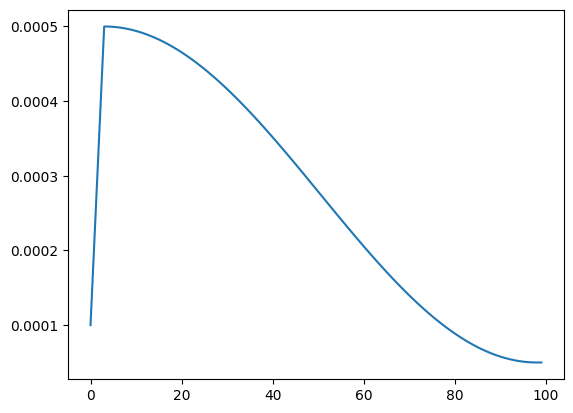

In [27]:
epochs = 100  # 25  # 15  # 12
learning_rate = 5e-4

epochs_warmup = 3
epochs_ending = 2
steps_per_epoch = int(size / BATCH_SIZE)

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    1e-4,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)
import matplotlib.pyplot as plt
plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)]);

In [28]:

early_stopping = EarlyStopping(
monitor='r2_mult_keras',
patience=15,
verbose=1,
restore_best_weights=True,
mode='max'
)

model = Model ()
# Compilar el modelo con pérdida MSE
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), loss='mean_squared_error',metrics=[  R2Score(
class_aggregation='uniform_average',
num_regressors=0,
name='r2_score',
dtype=None
),  r2_mult_keras])



In [29]:

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
class SaveBestModelEveryNEpochs(Callback):
    def __init__(self, save_freq, save_path):
        super(SaveBestModelEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.save_path =  save_path
        self.best_weights = None
        self.best_epoch = 0
        self.best_val_loss = -1111

    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_r2_mult_keras')

        if current_val_loss > self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.best_weights = self.model.get_weights()
            self.best_epoch = epoch

        if (epoch + 1) % self.save_freq == 0:
            print(f"Epoch {epoch+1}: saving model to {self.save_path}")
            self.model.save_weights(self.save_path)

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
            print(f"Loading best model from epoch {self.best_epoch+1} with val_loss {self.best_val_loss}")
            self.model.set_weights(self.best_weights)
            #self.model.save_weights(f"drive/MyDrive/leap/keras_models/{RAIZ}_model_all_data_complex_2.h5")

In [30]:
save_best_model_callback = SaveBestModelEveryNEpochs(save_freq=5, save_path=f"drive/MyDrive/leap/keras_models/{RAIZ}_model_all_data_path.h5")

In [31]:
x1_train[:size,:30,:].shape

(245760, 30, 9)

In [32]:
def create_dataset(x1, x2, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(((x1,x2),y.astype(np.float32)))
    dataset = dataset.shuffle(300_000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Assuming x1_train, x2_train, y_train, x1_val, x2_val, y_val are your numpy arrays

train_dataset = create_dataset(x1_train[:size,:,:], x2_train[:size], y_train[:size,12:], BATCH_SIZE)
val_dataset = create_dataset(x1_val[:val_size,:,:], x2_val[:val_size], y_val[:val_size,12:], BATCH_SIZE)

In [33]:
model([x1_train[:BATCH_SIZE,:,:],x2_train[:BATCH_SIZE]])

<tf.Tensor: shape=(1024, 48), dtype=float32, numpy=
array([[-0.14439602,  0.01729337,  0.2108085 , ..., -0.35931668,
        -0.47418445,  0.525743  ],
       [-0.29935277, -0.31329954, -0.02473711, ..., -0.37881595,
        -0.53071344,  0.6016016 ],
       [-0.83158267, -0.66818   , -0.42338592, ..., -0.12949626,
         0.06865542,  0.69750375],
       ...,
       [ 0.26060975,  0.31779134,  0.16650563, ..., -0.44199184,
        -0.4940046 ,  0.159969  ],
       [ 0.8429676 ,  0.72859246,  0.518588  , ...,  0.05232327,
         0.02425193,  0.3621844 ],
       [ 0.9431715 ,  0.88758224,  0.7465813 , ..., -0.09218391,
        -0.22442833,  0.34808916]], dtype=float32)>

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  0 (unused)
                                                                 
 bidirectional (Bidirection  multiple                  394240    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  multiple                  394240    
 onal)                                                           
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
 dense_4 (Dense)             multiple                  0 (unu

In [35]:
#model.load_weights(f"drive/MyDrive/leap/keras_models/{RAIZ}_model_all_data_path_bkp.h5")

In [36]:

#model.fit(train_dataset, epochs=300,validation_data=(val_dataset ),batch_size=BATCH_SIZE, callbacks=[early_stopping,save_best_model_callback ])




In [37]:
#model.save_weights(f"drive/MyDrive/leap/keras_models/{RAIZ}_model_all_data.h5")

In [38]:
RAIZ

'ptend_u'

In [39]:
x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE

2622464

In [40]:
model_loaded=Model()

In [41]:
model_loaded.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error',metrics=[  R2Score(
class_aggregation='uniform_average',
num_regressors=0,
name='r2_score',
dtype=None
),  r2_mult_keras])

In [42]:
model_loaded([x1_train[:BATCH_SIZE,:60,:],x2_train[:BATCH_SIZE]])

<tf.Tensor: shape=(1024, 48), dtype=float32, numpy=
array([[ 1.9916771e-01, -5.8082871e-02, -3.5327530e-01, ...,
        -1.3074156e+00, -1.3433706e+00, -1.1441382e+00],
       [ 2.4172992e-01, -3.3207174e-04, -3.9495054e-01, ...,
        -1.4575148e+00, -1.4778132e+00, -1.3275812e+00],
       [ 5.1447862e-01,  4.8435465e-01,  3.0222541e-01, ...,
        -4.9735036e-01, -2.0458150e-01,  2.9940695e-01],
       ...,
       [-1.1627589e-01, -2.9707959e-01, -3.4036660e-01, ...,
        -5.5656826e-01, -2.3021264e-01, -8.5496254e-02],
       [-3.2732198e-01, -4.4037554e-01, -3.9916202e-01, ...,
        -6.1583942e-01, -2.9628339e-01, -1.8066522e-01],
       [-4.8074713e-01, -6.1945260e-01, -7.1048015e-01, ...,
        -1.1147738e+00, -8.9478499e-01, -9.5320237e-01]], dtype=float32)>

In [44]:
model_loaded.load_weights(f"drive/MyDrive/leap/keras_models/{RAIZ}_model_all_data_path.h5")

In [45]:
# Define padding for each dimension (for dimension 0, 1, and 2)
padding_3d = [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0], [0, 0]]  # Add 1 zero at the beginning and 2 zeros at the end of dimension 0
padding_2d =  [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0],]
# Add padding to the 3D tensor
x1_test_padded = tf.pad(x1_test, padding_3d, "CONSTANT")
x2_test_padded = tf.pad(x2_test, padding_2d, "CONSTANT")

In [46]:
x1_test_padded.shape,x2_test_padded.shape

(TensorShape([2623488, 60, 9]), TensorShape([2623488, 16]))

In [47]:
tf.__version__

'2.15.0'

In [48]:
import ctypes
import gc
import random
def clear_memory():
    tf.keras.backend.clear_session()  # Clear the Keras session
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    gc.collect()  # Garbage collection
    print("GPU memory cleared.")

In [49]:
clear_memory()

GPU memory cleared.


In [50]:
y_pred = model_loaded.predict([x1_test_padded[:,:60,:],x2_test_padded],batch_size=BATCH_SIZE)

2562/2562 [==============================] - 133s 51ms/step


In [51]:
y_pred= y_pred[:y_test.shape[0]]

In [52]:
scores= []
for i in range(y_test[:,12:].shape[1]):
  score_=r2_score(y_test[:,12+i],y_pred[:,i])
  print(score_)
  scores.append(score_)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8678355027928861
0.8909746391664818


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8996863328709956
0.9062936446990079


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9010296036069821
0.8158656239351687


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.812933392481149


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7786295442002705
0.6902312553414145


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6617562854895331
0.6908825044539606


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6171329477490534
0.544990074217811


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5775556970656428
0.565060601778701


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.54493388602654
0.5237594716089045


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5015001092344048
0.48375054879466195


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4660257416836484
0.4451666053750256


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.4472917634881689
0.47538112027132806


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5033763526256712
0.5161259915403957


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.51572307911086
0.5099711620547174


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5109208017831779
0.5148508839530989


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5217980758539814
0.5440450031165966


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.5831749151262787
0.6255466885020751


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.6673649057393878
0.7155380069317339


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.7670348524909627
0.8154920840370796


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8526303693812304
0.8676435160056808


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8626309879425291
0.8654096798188362


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8710922952444602
0.8917972422058954


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.8864921424331463
0.8604728730576128


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:522: RuntimeWarning: overflow encountered in cast
  scl = avg_as_array.dtype.type(a.size/avg_as_array.size)


0.9466546377575714


In [1]:
np.mean(scores)

NameError: name 'np' is not defined

In [55]:
with open("drive/MyDrive/leap/keras_models/scores_u_new_arch2.npy","wb") as file:
  np.save(file,scores)

In [ ]:
import sys
sys.version